
<center>
    <div style="background-color: yellow; padding: 10px;">
        <h1>Telco Customer Churn Classification Project</h1>
    </div>
</center>



<div style="background-color: lightcyan; padding: 10px;">

# Project Overview:

### Predicting customer churn is critical for telecommunication companies to be able to effectively retain customers. It is more costly to acquire new customers than to retain existing ones. For this reason, large telecommunications corporations are seeking to develop models to predict which customers are more likely to change and take actions accordingly. 
 
### In this project, we build a model to predict how likely a customer will churn by analyzing its characteristics: (1) demographic information, (2) account information, and (3) services information. The project aims to predict a data-driven solution that will allow us to reduce churn rates and, as a consequence, to increase customer satisfaction and corporation revenue. 

</div>


<div style="background-color: orange; padding: 10px">

# Goal:

### This project aims to predict customer churn for a Telco company by building a classification model using historical customer data. 

### The goal is to identify factors influencing customer churn and create a predictive model that can forecast potential churners, allowing the company to take proactive retention measures.

</div>


# Imports libraries, modules

In [1]:
# custom modules for data prep:
import acquire as a
import prepare as p
import model as m
import explore as ex

# tabular manipulation
import numpy as np
import pandas as pd


#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#stats is great
from scipy import stats


# ML stuff:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,\
precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression #logistic not linear!
from sklearn.neighbors import KNeighborsClassifier #pick the classifier one


/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Acquire

 *    Data acquired from codeup mysql database called 'telco_churn'.
 *    It contained 7043 rows and 21 columns before cleaning.
 *    Each row represents a customer of telco company.
 *    Each column represents a feature of telco_churn database

In [2]:
df=a.get_telco_data()

this file exists, reading csv


## Prepare

   * Removed columns that did not contain useful information
   * Checked for nulls in the data (there were none)
   * Checked that column data types were appropriate
   * Removed white space from values in object columns
   * Target column 'churn' indicating whether the customer 'churn' or 'not churn'.
   * Added additional features to investigate:
   * Split data into train, validate and test (approx. 60/20/20), stratifying on 'churn'
    


In [3]:
df=p.prep_telco(df)
df.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


# Splitting into train, validate, & test

In [4]:
train,val,test=p.splitting_data(df,'churn')

In [5]:
# train dataframe displays
train.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,No,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,neither,Mailed check


### summary of the numerical features of the train data

In [6]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,4225.000000,4225.000000,4225.000000,4225.000000
mean,0.164260,32.650178,65.138947,2305.884888
std,0.370556,24.647481,30.336884,2282.408946
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.400000,408.250000
50%,0.000000,29.000000,70.550000,1389.350000
75%,0.000000,56.000000,90.400000,3886.450000
max,1.000000,72.000000,118.750000,8672.450000


# Explore

* work only with TRAIN data
* exploring features/relationship
    * find out what affects our target variable
    * find relationships between features
    * bivariate analysis (looking at 2 variables)
    * multivariabe analysis (looking at 3+ variables)
    * do a lot of documentation, write conclusions


## Categorical VS Continuous data type columns


In [7]:
# display cat and con columns of train
cat_col,con_col=ex.cat_con_col(train)
print(f'categorical columns:\n\n cat_col :{cat_col}')
print()
print()
print(f'continuous columns:\n\n con_col :{con_col}')

categorical columns:

 cat_col :['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']


continuous columns:

 con_col :['monthly_charges', 'total_charges']


In [8]:
columns_to_compare=ex.cat_not_churn(cat_col)
columns_to_compare

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'contract_type',
 'internet_service_type',
 'payment_type']

## Bar plot visualization categorical column VS 'churn'


Contingency Table for gender vs. churn:

churn     No  Yes
gender           
Female  1550  559
Male    1554  562


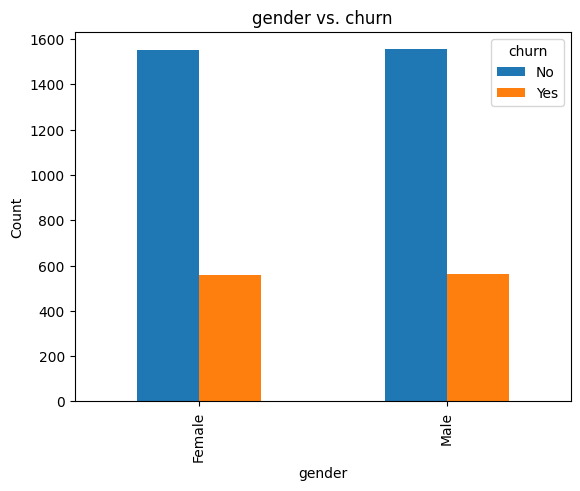


Contingency Table for senior_citizen vs. churn:

churn             No  Yes
senior_citizen           
0               2696  835
1                408  286


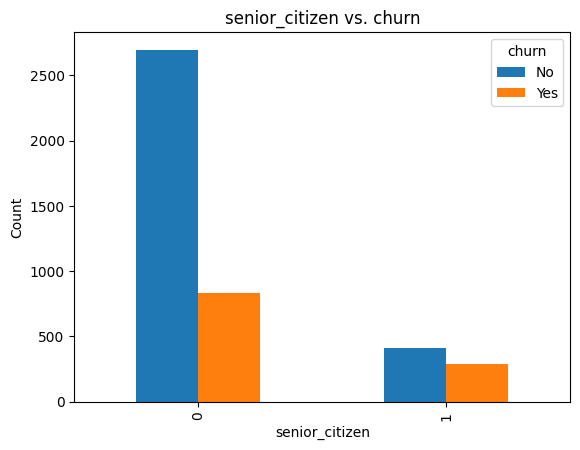


Contingency Table for partner vs. churn:

churn      No  Yes
partner           
No       1445  715
Yes      1659  406


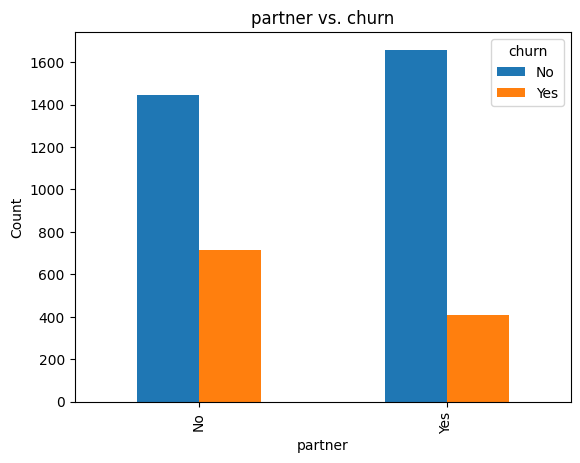


Contingency Table for dependents vs. churn:

churn         No  Yes
dependents           
No          2042  919
Yes         1062  202


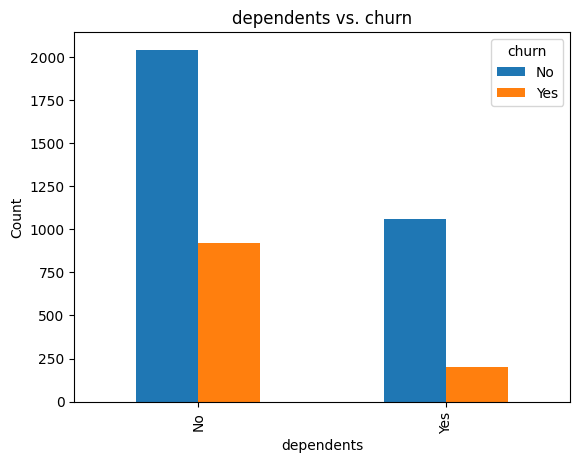


Contingency Table for tenure vs. churn:

churn    No  Yes
tenure          
0         8    0
1       128  225
2        61   81
3        67   57
4        57   51
...     ...  ...
68       51    6
69       60    4
70       65    5
71       94    4
72      228    5

[73 rows x 2 columns]


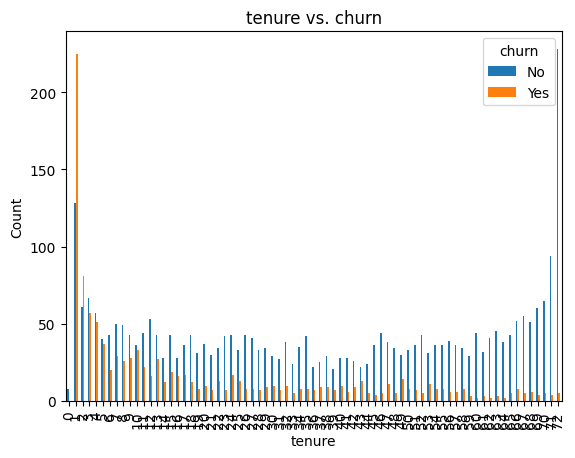


Contingency Table for phone_service vs. churn:

churn            No   Yes
phone_service            
No              295    99
Yes            2809  1022


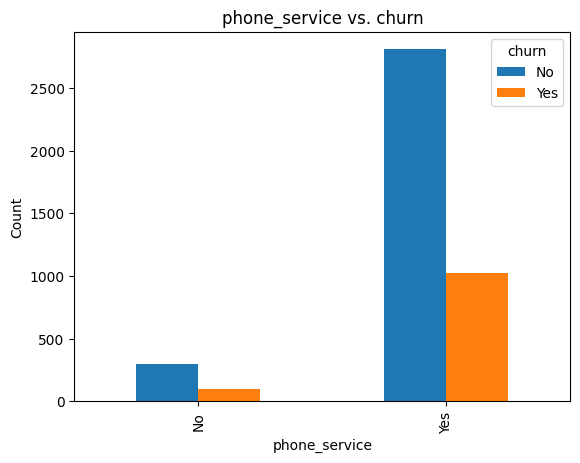


Contingency Table for multiple_lines vs. churn:

churn               No  Yes
multiple_lines             
No                1500  520
No phone service   295   99
Yes               1309  502


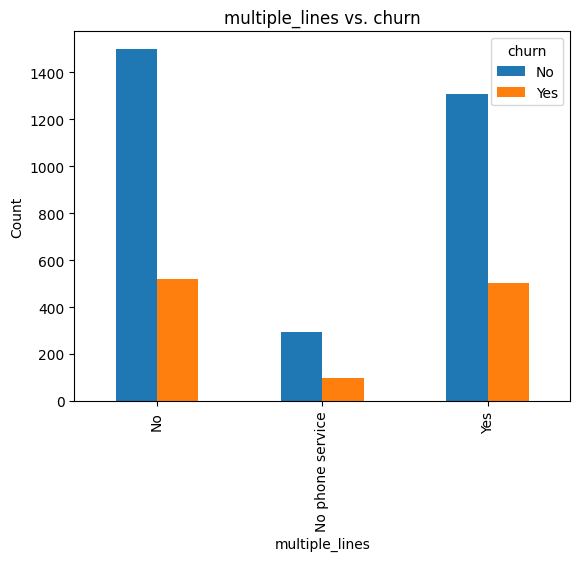


Contingency Table for online_security vs. churn:

churn                  No  Yes
online_security               
No                   1230  885
No internet service   848   70
Yes                  1026  166


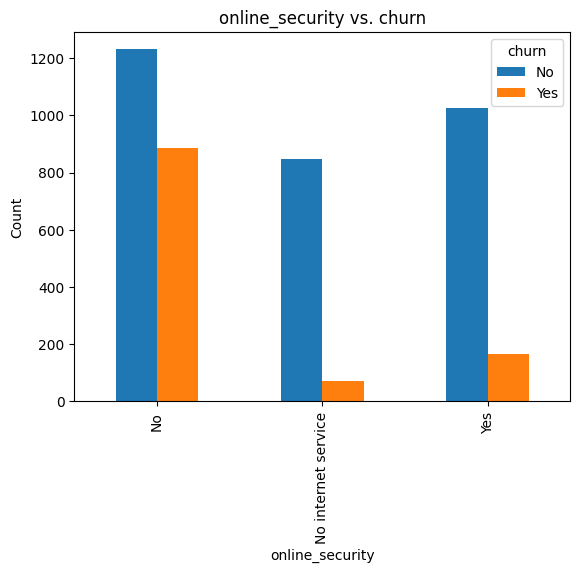


Contingency Table for online_backup vs. churn:

churn                  No  Yes
online_backup                 
No                   1097  732
No internet service   848   70
Yes                  1159  319


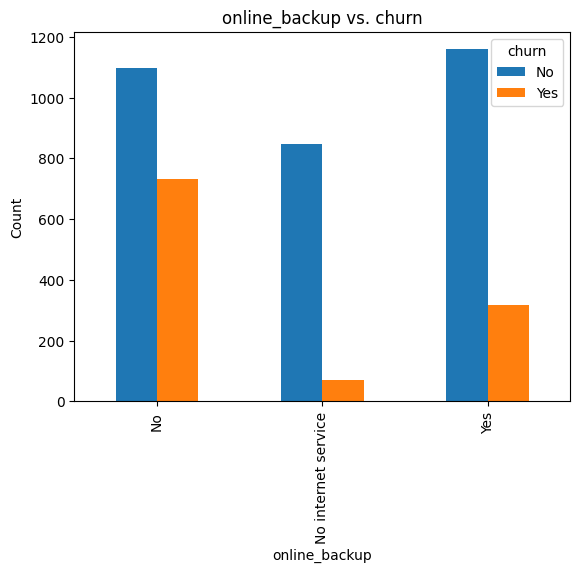


Contingency Table for device_protection vs. churn:

churn                  No  Yes
device_protection             
No                   1119  702
No internet service   848   70
Yes                  1137  349


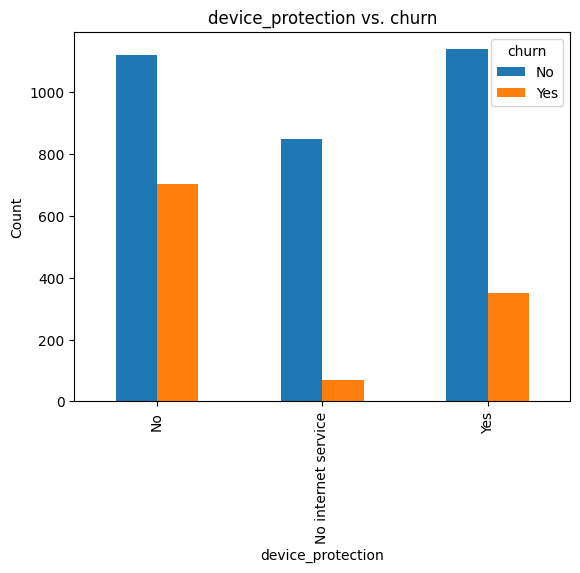


Contingency Table for tech_support vs. churn:

churn                  No  Yes
tech_support                  
No                   1230  866
No internet service   848   70
Yes                  1026  185


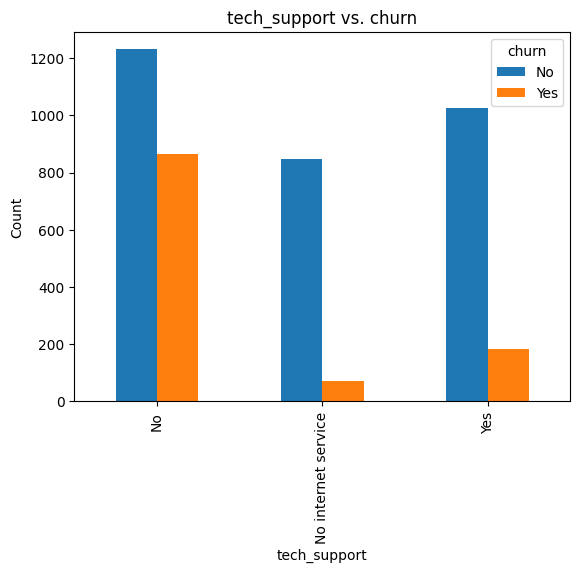


Contingency Table for streaming_tv vs. churn:

churn                  No  Yes
streaming_tv                  
No                   1100  573
No internet service   848   70
Yes                  1156  478


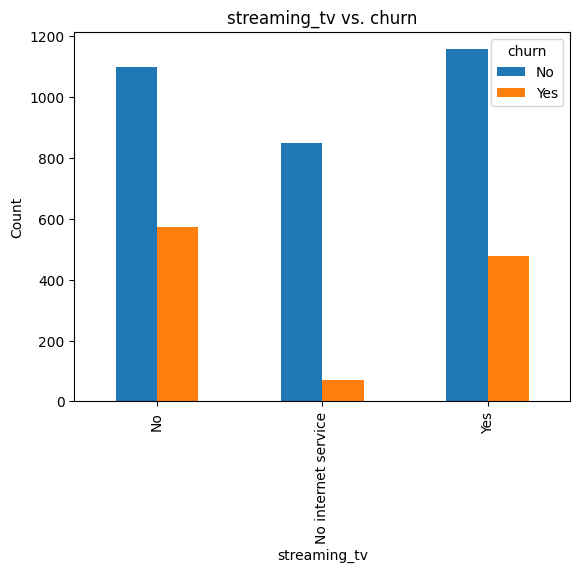


Contingency Table for streaming_movies vs. churn:

churn                  No  Yes
streaming_movies              
No                   1101  554
No internet service   848   70
Yes                  1155  497


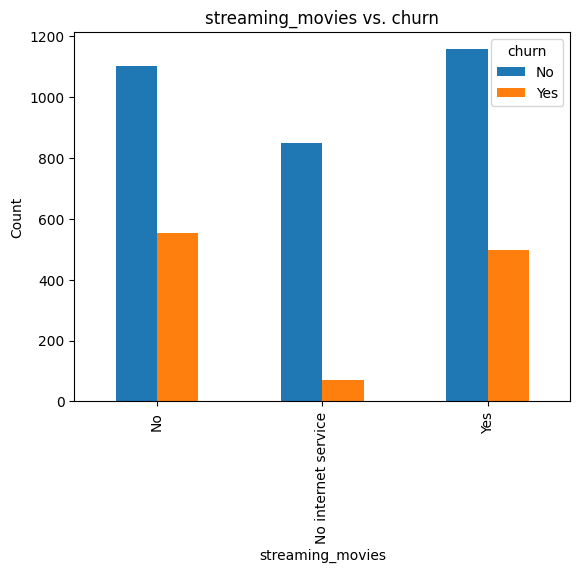


Contingency Table for paperless_billing vs. churn:

churn                No  Yes
paperless_billing           
No                 1437  281
Yes                1667  840


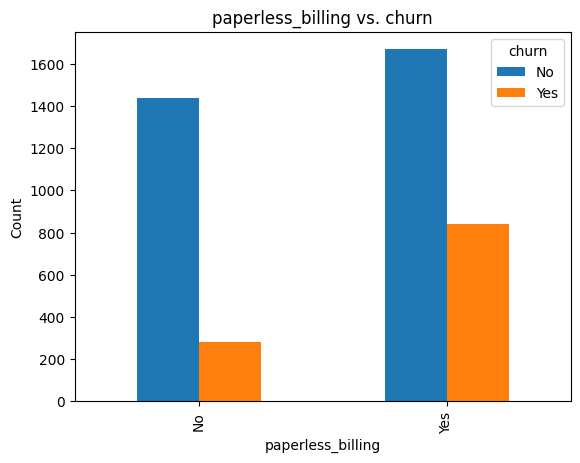


Contingency Table for contract_type vs. churn:

churn             No  Yes
contract_type            
Month-to-month  1338  997
One year         785   94
Two year         981   30


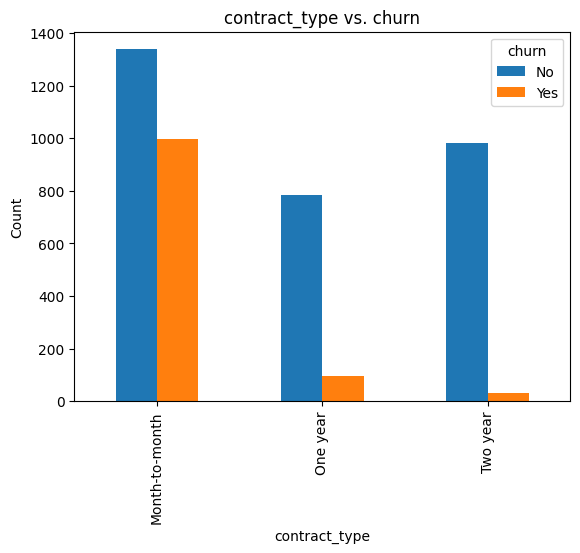


Contingency Table for internet_service_type vs. churn:

churn                    No  Yes
internet_service_type           
DSL                    1140  269
Fiber optic            1116  782
neither                 848   70


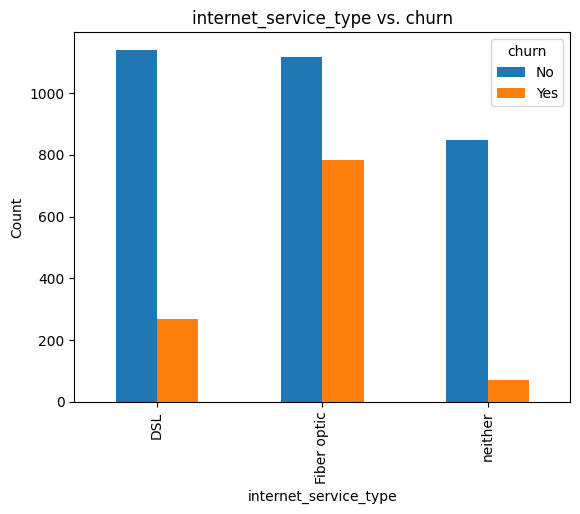


Contingency Table for payment_type vs. churn:

churn                       No  Yes
payment_type                       
Bank transfer (automatic)  778  157
Credit card (automatic)    783  138
Electronic check           788  646
Mailed check               755  180


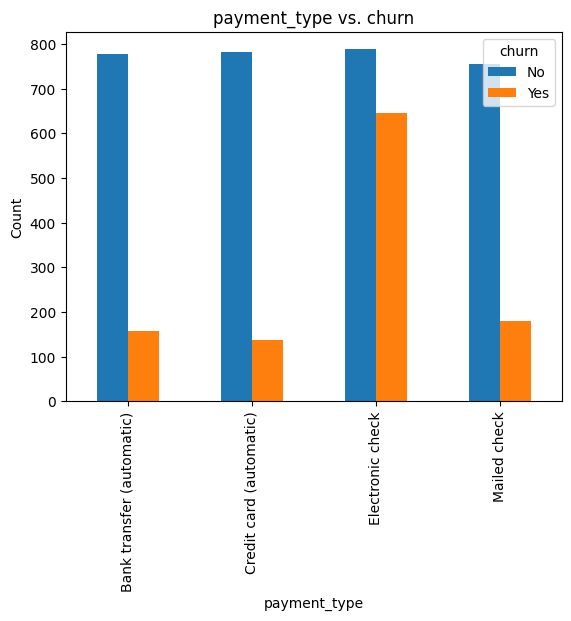

In [9]:
ex.explore_cat_target(train,columns_to_compare)

###  we can extract the following conclusions by analyzing various categorical attributes:
* gender:  We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.
* senior_citizen:  The churn rate of senior citizens is almost double that of young citizens.
* partner: Customers with a partner churn less than customers with no partner.
* contract_type: Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
* payment_type: Customers who opted for an electronic check as paying method are more likely to leave the company.
* paperless_billing: Customers subscribed to paperless billing churn more than those who are not subscribed.
* tenure: New customers (low tenure) are more likely to churn.
* phone_services & multiple_lines: We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
* online_security: Clients with online security churn less than those without it.
* tech_support: Customers with no tech support tend to churn more often than those with tech support.
* dependents: Customers with dependents have less numbers of churn than customers without dependents. 
* online_backup: with online backup has significantly less churned customers.
* device_protection: Customers with device protection have less chruned customers.
* streaming_tv: Customers with streaming tv have slightly less churned customers.
* streaming_movies: Customers with streaming moives have slightly less churned, but customers with no internet service have significantly less number of churned.
* internet_service_type: Customers with DSL have less churned as compared to Fiber optic, but customers with neither type of internet service have so much less churned.





## Boxplot visualization continuous columns VS 'churn'

In [10]:
# continuous columns
con_col

['monthly_charges', 'total_charges']

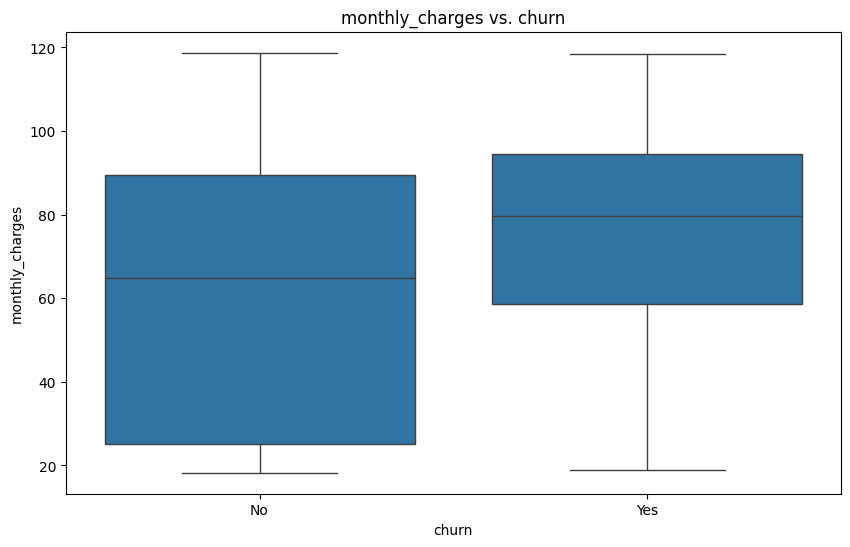

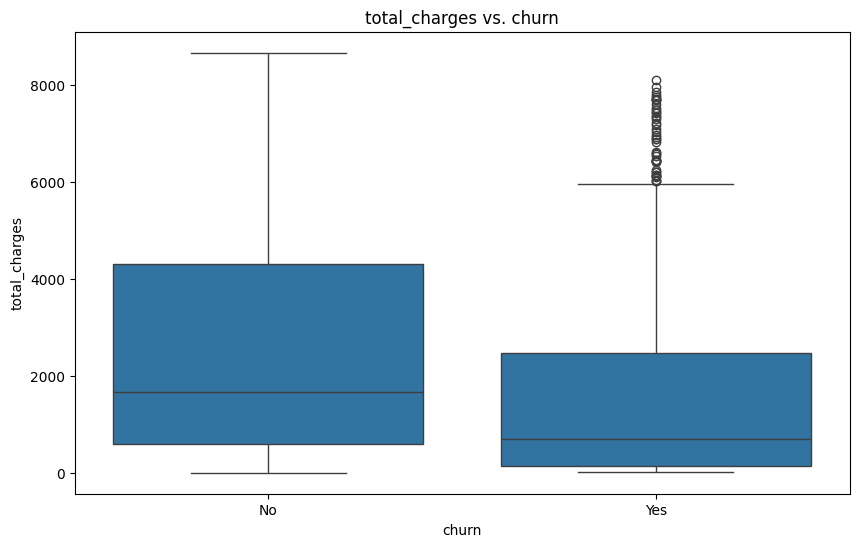

In [11]:
# boxplot continuous columns vs 'churn'
ex.explore_con_target(train,con_col)

### conclusion from boxplot

* The churn rate tends to be larger when monthly charges are high.
* Clients with high total charges are less likely to leave the company.


# Hypothesis building or Relationship check with target 

## 1st Hypothesis building:
## Q: does payment_type affect whether or not someone churned?

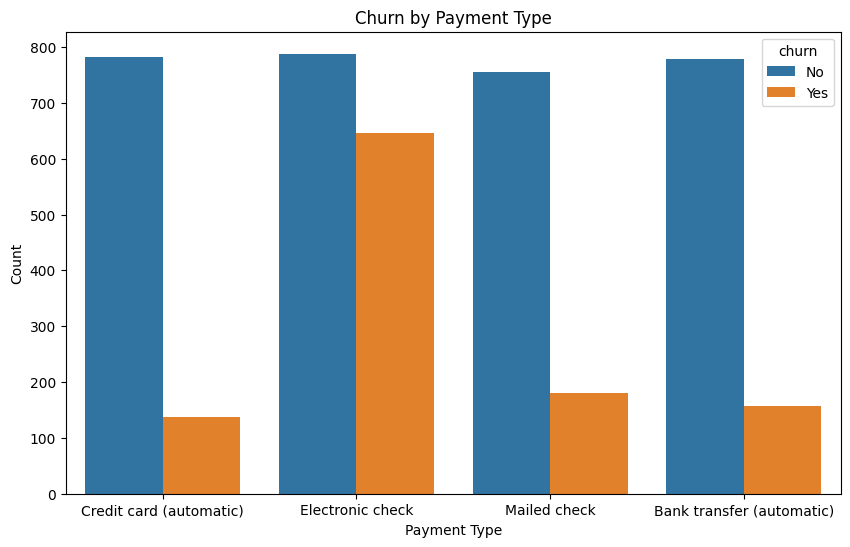

In [12]:
# visualized relationship between 'payment_type' Vs 'churn'

ex.bar_pay_tar(train)

NOTE:-- customers with electronic check payment type churned a lot more than other payment types. 

###  Analyze with stats:
 
I will now perform a chi-square test to determine if "payment_type" and "churn" are independant.
I will use a confidence interval of 95%
The resulting alpha is .05

#### Hypothesis Setting:(two categorical variables: use chi^2)
#### Ho: There is no relationship between 'payment_type' and 'churn'.
#### Ha: There is relationship between 'payment_type' and 'churn'.
#### alpha=0.05


In [13]:
# get chi^2 test:

ex.chi_pay_tar(train)

chi^2 = 386.1840
p     = 0.0000


> Since p-value < alpha, so we reject Ho.Therefore, there is significant relationship between 'payment_type' vs 'churn'.

### summarize:
* we have evidence to support that "payment_type" and "churn" are related. One particular type of payment method (Electronic check) shows a lot of customer churn. This might be due to some factor related to fees or delivery speed. 
* Recomendation: Will need to investigate further asking are these fees associated with each payment type or what are their delivery speeds.


## 2nd Hypothesis building

### Q: does contract type affect whether or not someone has churned?



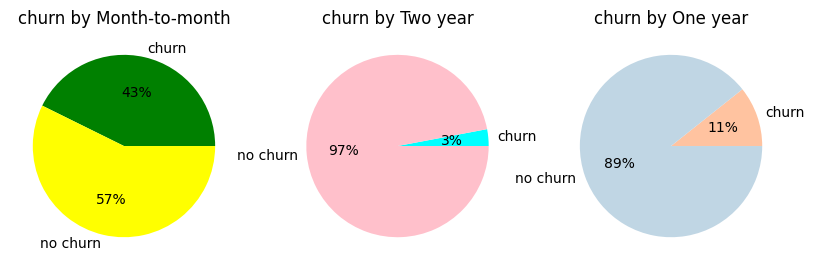

In [14]:
ex.pie_contract_tar(train)

### Analyze with stats:
I will now perform a chi-square test to determine if "contract_type" and "churn" are independant. I will use a confidence interval of 95% The resulting alpha is .05
### Hypothesis Setting:(two categorical variables: use chi^2)
### Ho: There is no relationship between 'contract_type' and 'churn'.
### Ha: There is relationship between 'contract_type' and 'churn'.
#### alpha=0.05

In [15]:
ex.chi_contract_tar(train)

chi^2 = 714.1745
p     = 0.0000


> since p < alpha, so we reject Ho.This concludes that there is relationship between 'contract_type' and 'churn'.

### summarize
* One particular contract type (month-to-month) has a lot of customers with churned status. This would make sense becuase people with long contracts can not churn as easily as customers with month to month contracts. 

* Suggestion: we might recommend and give attractive discount offer to customers for over a year, to prevent their churn rate is going high.

## 3rd Hypothesis test ( relationship)

### Hypothesis:
* Q: Does monthly charges indicate whether or not someone churned?

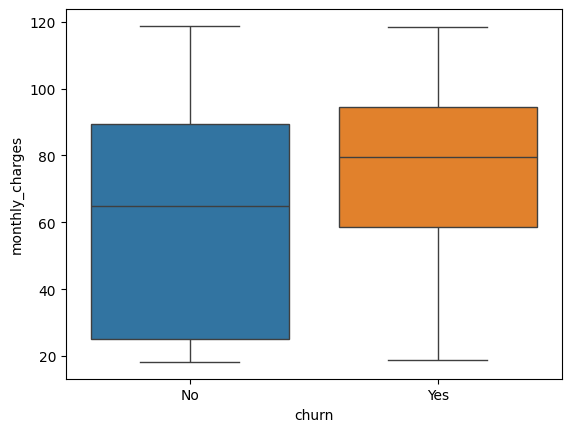

In [16]:
# visualization:
sns.boxplot(data=train, x='churn', y='monthly_charges',hue='churn')
plt.show()

## Analyze with mann-whitney test:

 I checked normality test by 'shapiro' test but i found Ho is rejected, the sample is not normal distribution.
 t-test can't apply for train dataset.
 so i am go through mann-whitney test for two sample mean, here i am calling that function which tests
 the mann-whitney test for two sample contains 'churn' and 'not churn' sample.
 
###  Hypothesis setting:
 
 * Ho: There is no relationship between 'monthly_charges' vs 'churn'.
 
 * Ha: There is relationship between 'monthly_charges' vs 'churn'.
 
 * confidence level 95%, alpha = 0.05


In [17]:
ex.get_mann_whitney(train)

stat:2136241.0
p_value:9.83259830397179e-30


> Since p_value < alpha, we reject the Ho. This concludes there is significate relationship between 'monthly_charges' and 'churn.

### summarize:
* conclusion:The customer with high monthly charge is more likely to churn.
* recommendation: we might recommend and give attractive discount offer to customers for over a year, to prevent their churn rate is going high. 

## 4th Hypothesis test ( relationship)

### Hypothesis:
* Q: do many customers churn after a certain period? 
        
        or

*  Q: Does tenure affects the churned customer?

> Visualize

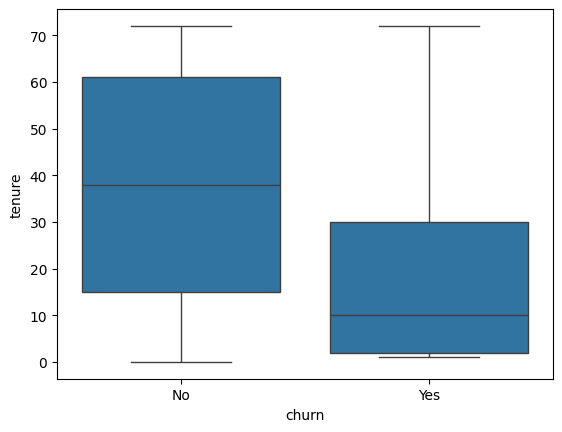

In [18]:
sns.boxplot(data=train, y='tenure', x='churn');

* It appears customers are churning early on in their tenure. 

* It is indicating whether longer or shorter tenures have an influence on the likelihood of a customer churning.

## Analyze 
* comparing categorical to categorical because we are going to bin tenure into years, of which the higest tenure is 72 months.so i will getting only 7 values of tenure.

Ho: There is no relationship between tenure and whether or not someone has churned

Ha: There is a relationship between tenure and whether or not someone has churned

alpha=0.05


In [19]:
# using chi^2 test over the train dataset 
# tenure_years is binned from 'tenure'
# creating contingency table (cross table between 'churn' and tenure_years)
ex.chi_tenure_tar(train)

             tenure tenure_years
customer_id                     
4083-BFNYK       38            3
5804-LEPIM        2            0
4895-TMWIR       11            0
1342-JPNKI       10            0
3397-AVTKU       43            3
...             ...          ...
1915-IOFGU        1            0
7025-WCBNE       47            3
9788-HNGUT       72            6
5229-PRWKT        8            0
7562-UXTPG       13            1

[4225 rows x 2 columns]
tenure_years    0    1    2    3    4    5    6
churn                                          
No            626  448  422  343  417  620  228
Yes           609  164  110   95   89   49    5
Observed
[[626 448 422 343 417 620 228]
 [609 164 110  95  89  49   5]]

Expected
[[907 449 390 321 371 491 171]
 [327 162 141 116 134 177  61]]

----
chi^2 = 561.8805
p     = 0.0000


> Since p < alpha, so we reject Ho. This concludes there is significant relationship between 'tenure' and 'churn'.

## summarize
* Above result and test shows that there is significant relationship between 'tenure' and 'churn'.
* customers at higher risk of churning based on tenure-related behavior patterns.

### Recommendation:
           
* Identify high-risk tenure periods when churn rates tend to increase. Implement targeted retention campaigns during these phases, offering personalized support, exclusive benefits, or loyalty rewards to prevent churn.
            
* communication to address concerns and improve service quality.
           
           




In [20]:
# just insight over train dataset
train.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_years
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,No,...,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),3
5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,No,...,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,0
4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,neither,Mailed check,0


In [21]:
# drop new created column 'tenure_years'
train=train.drop(columns='tenure_years')
train.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,No,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,neither,Mailed check


## Preprocessing ( For Modeling )

In [22]:
# encoding with each dataframes train, validate, and test

train_en,val_en,test_en=m.preprocess_telco(train,val,test) 


In [23]:
# dataframe display for encoded train data
train_en.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_neither,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,1,38,95.00,3591.25,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
5804-LEPIM,1,2,70.35,139.05,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
4895-TMWIR,1,11,19.95,214.75,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [24]:
# separate independents feature & target

X_train, y_train = train_en.drop(columns='churn_Yes'), train_en.churn_Yes
X_validate, y_validate = val_en.drop(columns='churn_Yes'), val_en.churn_Yes
X_test, y_test = test_en.drop(columns='churn_Yes'), test_en.churn_Yes

In [25]:
X_train.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_neither,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,1,38,95.00,3591.25,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
5804-LEPIM,1,2,70.35,139.05,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4895-TMWIR,1,11,19.95,214.75,1,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1


In [26]:
y_train.head(3)

customer_id
4083-BFNYK    0
5804-LEPIM    1
4895-TMWIR    1
Name: churn_Yes, dtype: int64

In [27]:
X_validate.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_neither,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
0486-LGCCH,0,11,19.65,225.75,1,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,1
8436-BJUMM,0,26,83.75,2070.60,1,1,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0
7816-VGHTO,0,6,40.55,217.50,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [28]:
y_validate.head(3)

customer_id
0486-LGCCH    0
8436-BJUMM    1
7816-VGHTO    0
Name: churn_Yes, dtype: int64

# Baseline: Before i am going through all these models, i will figure out the baseline for train data which can be referenced to each encoded split.



In [29]:
# i am going to find the baseline of churn
y_train.value_counts()

churn_Yes
0    3104
1    1121
Name: count, dtype: int64

In [30]:
# i am going to find the baseline of churn
y_train.mode()

0    0
Name: churn_Yes, dtype: int64

In [31]:
# code way, the baseline accuracy
y_train.value_counts(normalize=True)[0]

0.7346745562130178

In [32]:
# another way also to find the accuracy of baseline model
(y_train==0).mean()

0.7346745562130178

> concluion : - baseline predict is 0 

              - baseline accuracy is 73%  

### Let's explore metrices from Baseline Model

In [33]:
y_train.head()

customer_id
4083-BFNYK    0
5804-LEPIM    1
4895-TMWIR    1
1342-JPNKI    1
3397-AVTKU    0
Name: churn_Yes, dtype: int64

In [34]:
y_train.shape


(4225,)

In [35]:
max_mode_y_train=y_train.value_counts().idxmax()
max_mode_y_train

0

In [36]:
# Create a baseline prediction list with the max_mode_y_train for all samples 
baseline_predictions = [max_mode_y_train] * len(y_train)
baseline_predictions[:10]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [37]:
pd.crosstab(y_train,baseline_predictions)

col_0,0
churn_Yes,
0,3104
1,1121


# Modeling

* Baseline accuracy for 'no churn' from train dataframe is 0.7346745562130178.
* 'no churn' makeup 73% of the data.
* by guessing 'no churn' for every customer  could achieve an accuracy of 73%. 
* 73% will be the baseline accuracy I use for this project.
* I will be evaluating models developed using three different model types and various hyperparameter    configurations. 
* Models will be evaluated on train and validate data.
* The model that performs the best will then be evaluated on test data.


## Model 1 for Decision Tree Algorithm 

In [38]:
m.get_tree(X_train, X_validate, y_train, y_validate)

Accuracy of Decision Tree on train data is 0.8023668639053254
Accuracy of Decision Tree on validate data is 0.7927608232789212


## Model 2 for Random forest algorithm 

In [39]:
m.get_forest(X_train, X_validate, y_train, y_validate)

Accuracy of Random Forest on train is 0.8068639053254438
Accuracy of Random Forest on validate is 0.7991483321504613


## Model 3 for logistic Regression algorithm

In [40]:
m.get_log_reg(X_train, X_validate, y_train, y_validate)

Accuracy of Logistic Regression on train is 0.8040236686390533
Accuracy of Logistic Regression on validate is 0.8034066713981547


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Comparing Models 
- Decision Tree, Random Forest, and Logistic Regression models all performed about equal to baseline on train and validate.

- Decision Tree is overfitted,and Random forest is better on train but it slightly overfitted as compare to validate data.  

- The logistic regression model performed better on train data and  it is neither over or under fitted.

- Because the results of the Decision Tree, Random Forest, and Logistic Regression models were all very similar I   could proceed to test with model of algorithm logistic regression.

* I have chosen to move forward with the logistic regression model.


## model with logistic regression algo  apply on  test data

In [41]:
lr= LogisticRegression(C=1,random_state=123)
lr.fit(X_train, y_train)


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, random_state=123)

In [42]:
acc_test=lr.score(X_test,y_test)
acc_test

0.8019872249822569

In [43]:
# predicted values from X_test
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
# predicted probabilities from X_test
y_proba=lr.predict_proba(X_test)
y_proba

array([[0.90025678, 0.09974322],
       [0.98756494, 0.01243506],
       [0.4697977 , 0.5302023 ],
       ...,
       [0.70694159, 0.29305841],
       [0.9761163 , 0.0238837 ],
       [0.97447751, 0.02552249]])

In [45]:
acc_test=lr.score(X_test,y_test)
print(f'accuracy of logistic regression on test data: {acc_test}')

accuracy of logistic regression on test data: 0.8019872249822569


## Modeling Summary

* Decision Tree, Random Forest, and Logistic Regression models all performed about equal to baseline on train and validate.
* The Random Forest model performed slightly better on train data but slightly overfitted on validate data. It is slightly overfit.
* A Logistic Regression model selected as the final model and had an accuracy of about 80% which is higher than baseline accuracy 73% as compare to others models.

## prediction csv file on test dataset

In [46]:
probs_churn=[]
for item in y_proba:
    probs_churn.append(item[1])
probs_churn[:10]

[0.09974322293601806,
 0.012435061416363481,
 0.5302022971586398,
 0.051665255681008805,
 0.22136026782396284,
 0.07802921177171902,
 0.027420222215197278,
 0.49465185692603214,
 0.19748607413277125,
 0.6532867338642788]

In [47]:
X_test['probability_of_churn']=probs_churn

In [48]:
X_test.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_neither,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,probability_of_churn
customer_id,,,,,,,,,,,,,,,,,,,,,
6941-KXRRV,1,48,58.95,2789.7,0,1,0,1,0,0,...,1,1,1,0,0,0,0,0,0,0.099743
0206-OYVOC,0,46,19.25,864.2,0,1,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0.012435
7442-YGZFK,0,1,49.80,49.8,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0.530202


In [49]:
X_test['churn_predict']=y_pred

In [50]:
X_test.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_neither,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,probability_of_churn,churn_predict
customer_id,,,,,,,,,,,,,,,,,,,,,
6941-KXRRV,1,48,58.95,2789.7,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0.099743,0
0206-OYVOC,0,46,19.25,864.2,0,1,1,1,0,0,...,1,0,1,0,1,0,0,1,0.012435,0
7442-YGZFK,0,1,49.80,49.8,1,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0.530202,1


In [51]:
prediction_csv=X_test.reset_index()[['customer_id','probability_of_churn','churn_predict']]
prediction_csv

,customer_id,probability_of_churn,churn_predict
0,6941-KXRRV,0.099743,0
1,0206-OYVOC,0.012435,0
2,7442-YGZFK,0.530202,1
3,9018-PCIOK,0.051665,0
4,1591-MQJTP,0.221360,0
...,...,...,...
1404,0378-CJKPV,0.050893,0
1405,3551-HUAZH,0.817284,1
1406,6322-PJJDJ,0.293058,0
1407,4227-OJHAL,0.023884,0


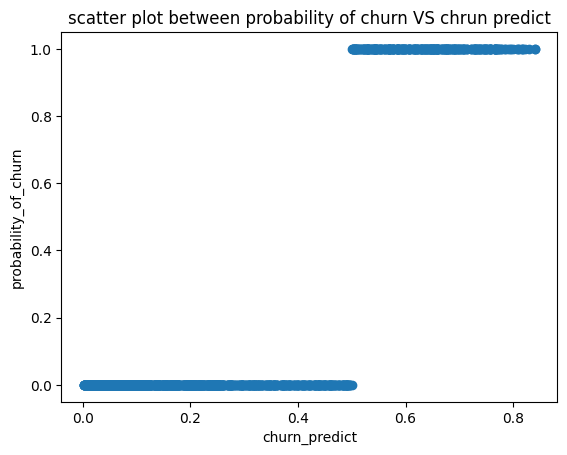

In [52]:
# Scatter plot between 'probability of churn'  VS 'chrun predict'
plt.scatter(prediction_csv.probability_of_churn,prediction_csv.churn_predict)
plt.xlabel('churn_predict')
plt.ylabel('probability_of_churn')
plt.title('scatter plot between probability of churn VS chrun predict');

In [53]:
# Read to csv file

prediction_csv.to_csv('prediction_telco.csv')

# Conclusions

> ### Exploration

* churn in Telco  occur in about baseline 73% (~3/4).
* Customer with having phone_service,online_security,online_backup,device_protection,tech_support, is less churned.
* Those customers whose sign up for only month-to-month contract, could high possible rate to churn.
* The customer with high monthly charge is more likely to churn.
* we have evidence to support that "payment_type" and "churn" are related. One particular type of payment method (Electronic check) shows a lot of customer churn. This might be due to some factor related to fees or delivery speed.


> ### Modeling

* The final model(logistic regression) success to significantly perform the baseline over the test dataset.
* A Logistic Regression model selected as the final model and had an accuracy of about 80% which is higher than  baseline accuracy 73%.
 
>### Recommendations

* we might recommend and give attractive discount offer to customers for over a year, to prevent their churn rate is going high.

* Will need to investigate further asking are these fees associated with each payment type or what are their delivery speeds or how thes are conveience to make a payment.

* Identify high-risk tenure periods when churn rates tend to increase.Implement targeted retention campaigns during these phases, offering personalized support, exclusive benefits, or loyalty rewards to prevent churn.

* communication to address concerns and improve service quality.

* Implement continuous improvements in service quality, network coverage, or additional features that align with customer preferences like payment_type, contract_type, online security, tech supports e.t.c.



> ### Next Steps

* Remember, these steps are iterative, and revisiting earlier stages might be necessary to refine the model or address new findings.

* Communication of results and actionable insights to stakeholders is also crucial for the success of the project.

 